<a href="https://colab.research.google.com/github/Steve-YJ/Exp-Standalone-DeepLearning/blob/master/Code_Lec2_Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 홀로서기 

* Reference: <a href='https://github.com/heartcored98/Standalone-DeepLearning'>Standalone-DeepLearning</a>
* Date: 20.07.18.sat. pm4:30
* Notice
    * 본 노트북은 KAIST Standalone-DeepLearning을 공부하며 작성한 노트북입니다.
    * 개인 학습 목적으로 Coding Skill 향상과 이론적인 이해를 지향합니다

* Review<br>
    ✅ Do Lec2-Code<br>
    Review-Lec2


**이번 시간은 Python으로 구현하는 것이 아닌 PyTorch Framework를 통해 구현하는 것이 목표입니다**

---

## 00. Install Pytorch 1.0(For google Colab)

In [1]:
import torch
print(torch.__version__)

1.5.1+cu101


오늘도 역시 중요한 것은 '흐름'을 배우는 것이다<br>
모델의 학습이 어떤 프로세스로 이루어지는지 Flow를 익히자!

* Reference:https://github.com/Steve-YJ/Standalone-DeepLearning/blob/master/Lec2/Lab2_pytorch_regression_demo.ipynb

## 1. Data Generation(Preparation)

* Regression 실습에 사용할 데이터 생성(만들기)
    * X가 2차원 Y가 1차원인 데이터를 생성한다
    * sin(x)함수와 log(x)함수 모두 쉽게 생각할 수 있는 non-linear함수이다

* X, Y데이터 3차원 공간에 시각화(3-Dimension)
    * numpy의 random.rand() 함수를 사용하면 n개의 랜덤 샘플을 0~1의 uniform distribution에서 샘플링 할 수 있다.
<br><br><br>
$$ e \sim \mathcal{N} (0, 0.5) $$$$y = \ 2 sin(x_1) + log({1 \over 2}x_2^2) + e$$
Data Set
$$X_{train} \in \mathcal{R}^{1600 \times 2}, Y_{train} \in \mathcal{R}^{1600}$$
$$X_{val} \in \mathcal{R}^{400 \times 2}, Y_{val} \in \mathcal{R}^{400}$$
$$X_{test} \in \mathcal{R}^{400 \times 2}, Y_{test} \in \mathcal{R}^{400}$$

* 이해하기
    * train_X: 2개의 feature, 1600개의 instance e.g (1600,2)
    * train_y: 1600개의 벡터 e.g) (1600,)

(2400, 2)


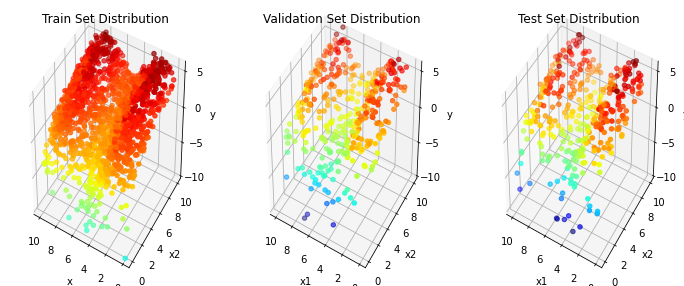

In [7]:
%matplotlib inline

# Library Import
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ======= Generating Dataset ======= #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
print(np.array([x1, x2]).T.shape)
X = np.array([x1, x2]).T  # T: Transpose
# y = 2*np.sin(x1) + np.log(0.5*x2**2) + 2  # 위의 markdown 수식 참고
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e  # 위의 markdown 수식 참고

# ======= Split Dataset into Train, Validation, Test ======= #
# train, test, validation set으로 split해준다
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# ======= Visualize Each Dataset ======= #
fig = plt.figure(figsize=(12, 5)) 
ax1 = fig.add_subplot(1, 3, 1, projection='3d')  # 앞으로는 subplot을 많이 이용할 것입니다
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

## 2. Hypothesis Define(Model Define)

$$H = \ XW + b \ \ ( W \in \mathcal{R}^{2 \times 1}, b \in \mathcal{R}^{1}, H \in \mathcal{R}^{N \times 1})$$
MLP Model$$Let \ relu(X) = \ max(X, 0)$$

$$h = \ relu(X W_1 + b_1) \ \  ( W_1 \in \mathcal{R}^{2 \times 200}, b_1 \in \mathcal{R}^{200}, h \in \mathcal{R}^{N \times 200})$$
$$H = \ h W_2 + b_2  \ \  ( W_2 \in \mathcal{R}^{200 \times 1}, b_2 \in \mathcal{R}^{1}, H \in \mathcal{R}^{N  \times 1})$$

hypothesis(다른 말로 우리가 사용할 모델)으로는 Linear한 모델을 사용할 것입니다.

In [8]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):  # nn.Module class를 상속합니다
    def __init__(self):
        super(LinearModel, self).__init__()  # 상속을 하고난 이후에 실행해야 하는 python 문법
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)  # 객체 생성
                                                                           # 인스턴스 변수가 아닌 Linear 객체를 생성한 것입니다
                                                                           # 2개의 feature를 입력으로 받고 1개의 feature를 출력함

    def forward(self, x):  # 항상 forward로 해야합니다!
        # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴
        return self.linear(x)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()  
        
    def forward(self, x):
        # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [9]:
lm = LinearModel()
print(lm.linear.weight)
print(lm.linear.bias)

Parameter containing:
tensor([[-0.4803, -0.4682]], requires_grad=True)
Parameter containing:
tensor([-0.4526], requires_grad=True)


## 3. Cost Function Define(Loss Function Define)

* Regression Problem에서의 Loss Function작성
* 파이토치 nn package에는 다양한 Loss Function들이 이미 구현되어 있음
* 실습에서는 Regression 문제를 해결하기 위해 Mean Squared Error Loss를 사용

In [10]:
reg_loss = nn.MSELoss()  # nn package에서 MSELoss() 모듈을 불러오면 됩니다


#uncomment for testing Loss Function
test_pred_y = torch.Tensor([0, 0, 0, 0])
test_true_y = torch.Tensor([0, 1, 0, 1])

print(reg_loss(test_pred_y, test_true_y))
print(reg_loss(test_true_y, test_true_y))

tensor(0.5000)
tensor(0.)


In [11]:
test_pred_y = torch.Tensor([0, 0, 0, 0, 0, 1])
test_true_y = torch.Tensor([1, 0, 0, 0, 0, 0])

print(reg_loss(test_pred_y, test_true_y))
print(reg_loss(test_pred_y, test_true_y))

tensor(0.3333)
tensor(0.3333)


아...! nn.MSELoss()가 잘 동작하고 있구나

## 4. Train & Evaluation
* 지금까지 한 작업
    * Data Preparation
    * Model Define
    * Cost Function Define

* Tip
    * Epoch과 Iteration
    * 전체 데이터를 한 번 돌면 Epoch
    * 한 batch를 돌면 Iteration

"논문들을 보면 Epoch마다 Loss Function을 확인하는 경우가 있고, Iteration마다 Loss Function을 확인하는 경우가 있다"

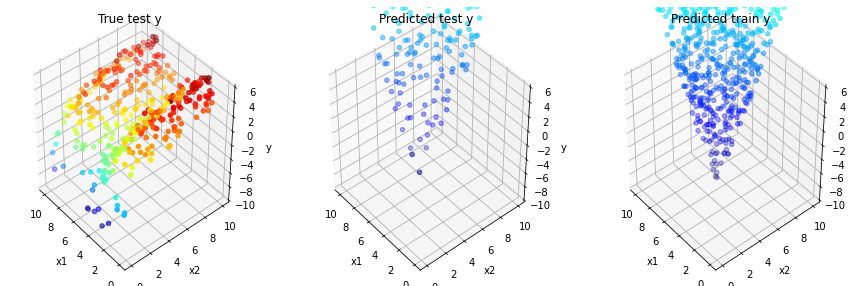

0 tensor(561.0393, grad_fn=<MseLossBackward>)


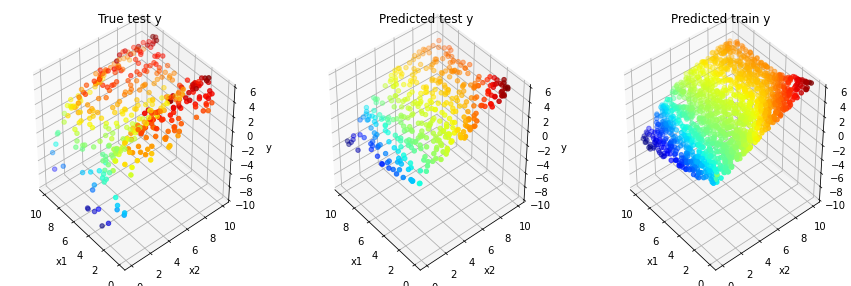

200 tensor(2.4412, grad_fn=<MseLossBackward>)


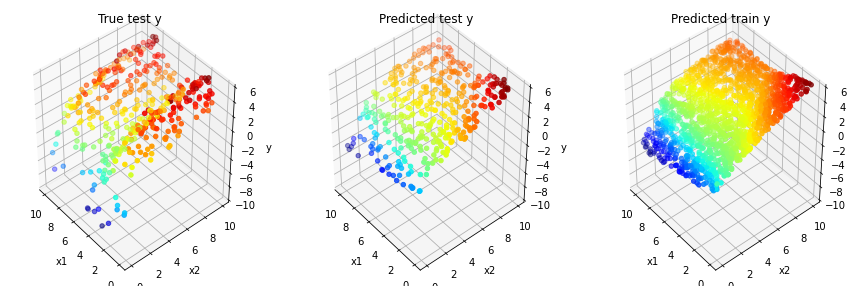

400 tensor(2.1340, grad_fn=<MseLossBackward>)


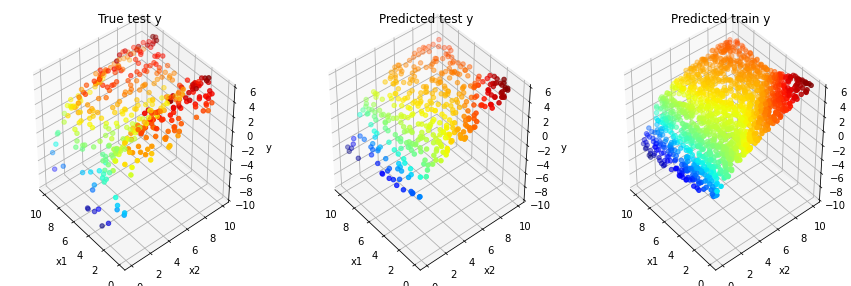

600 tensor(1.9714, grad_fn=<MseLossBackward>)


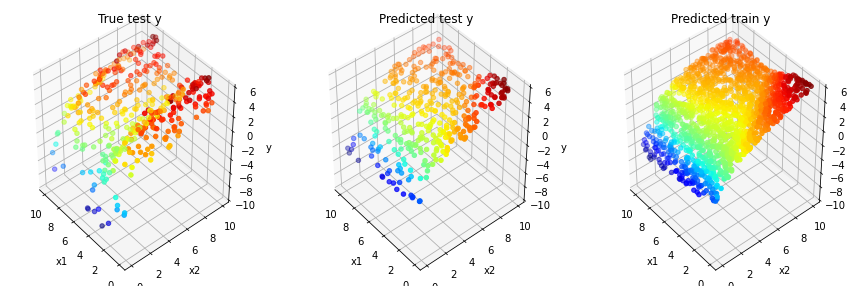

800 tensor(1.8685, grad_fn=<MseLossBackward>)


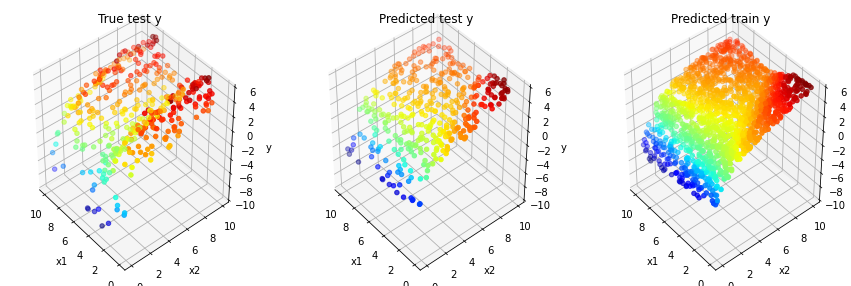

1000 tensor(1.7779, grad_fn=<MseLossBackward>)


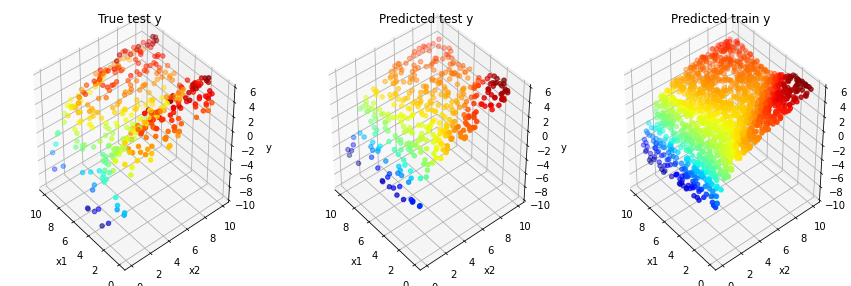

1200 tensor(1.6949, grad_fn=<MseLossBackward>)


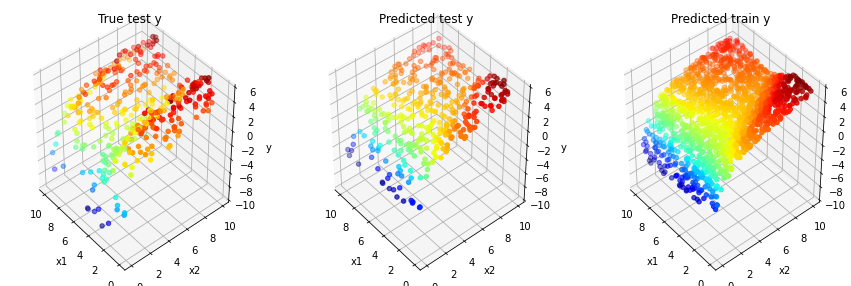

1400 tensor(1.6047, grad_fn=<MseLossBackward>)


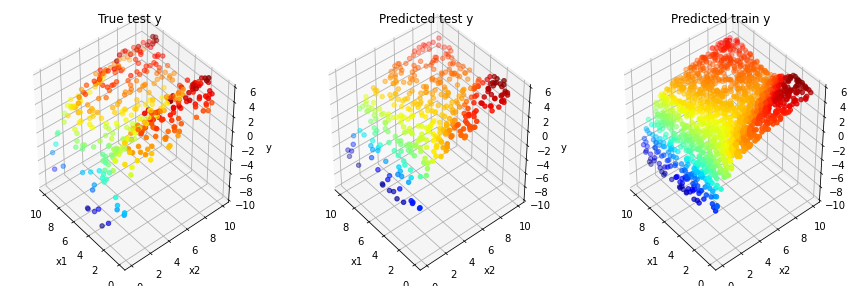

1600 tensor(1.5264, grad_fn=<MseLossBackward>)


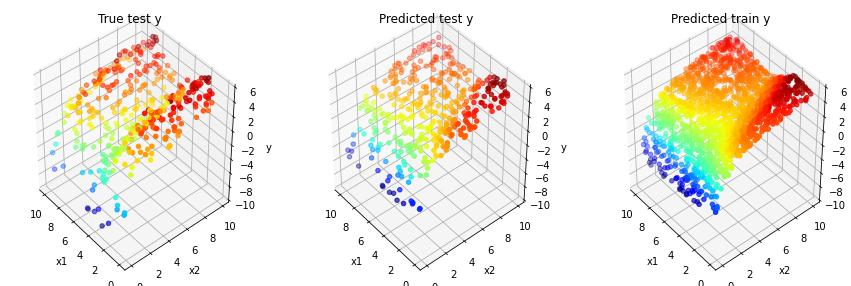

1800 tensor(1.4560, grad_fn=<MseLossBackward>)


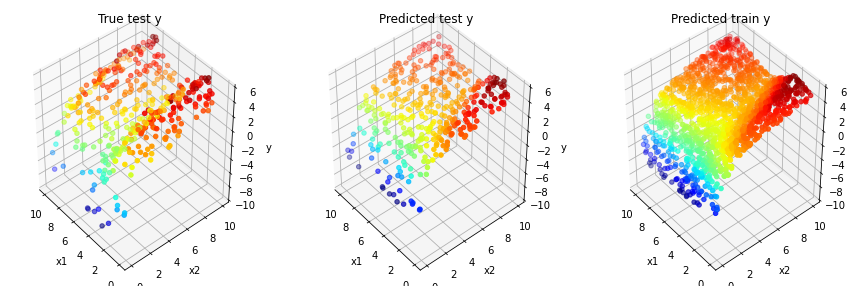

2000 tensor(1.3861, grad_fn=<MseLossBackward>)


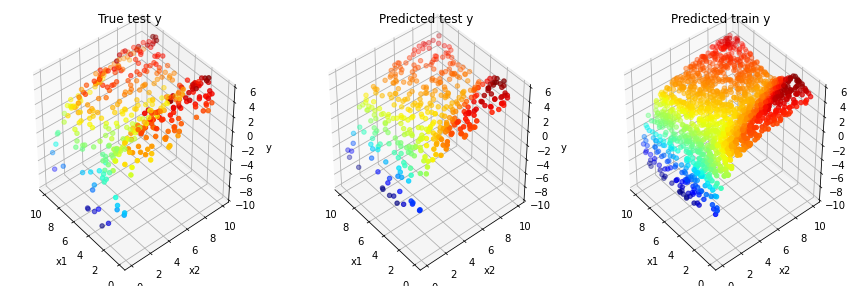

2200 tensor(1.3200, grad_fn=<MseLossBackward>)


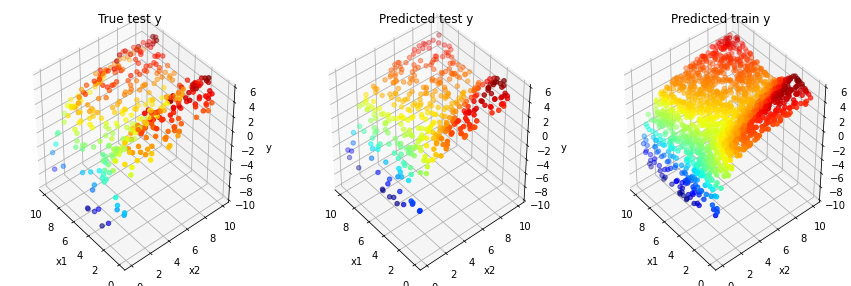

2400 tensor(1.2678, grad_fn=<MseLossBackward>)


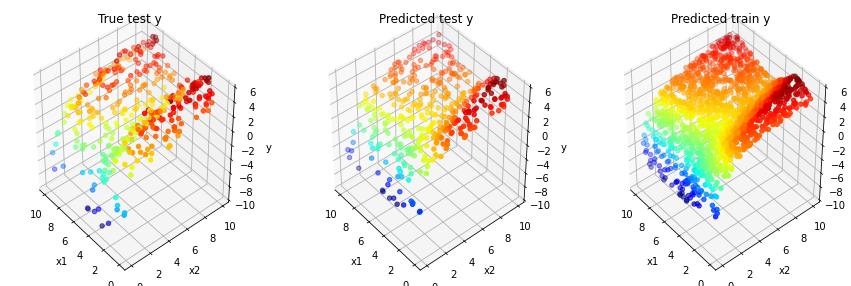

2600 tensor(1.2231, grad_fn=<MseLossBackward>)


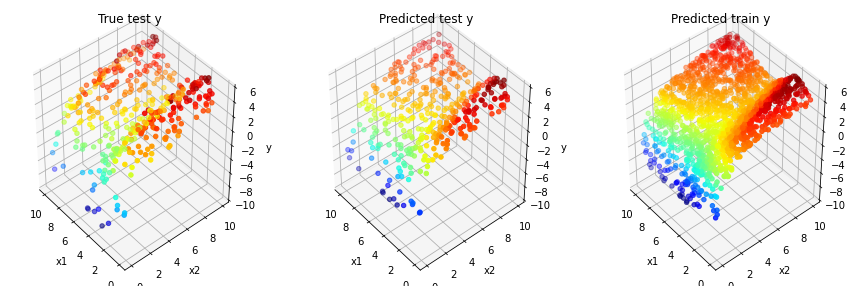

2800 tensor(1.1829, grad_fn=<MseLossBackward>)


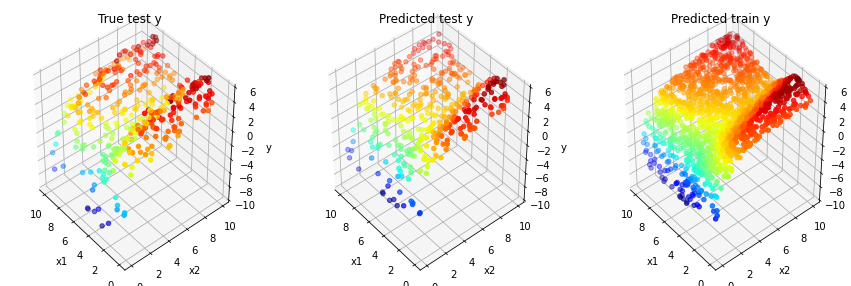

3000 tensor(1.1509, grad_fn=<MseLossBackward>)


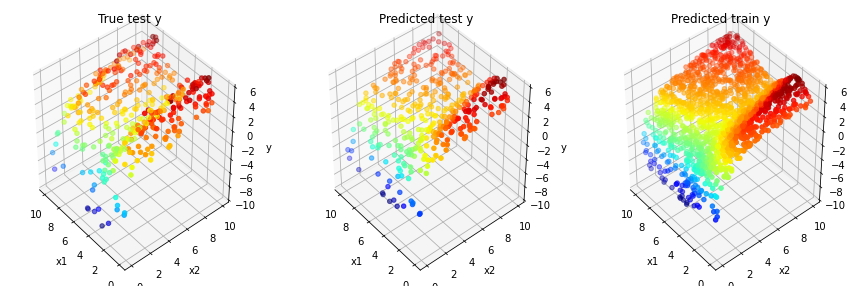

3200 tensor(1.1224, grad_fn=<MseLossBackward>)


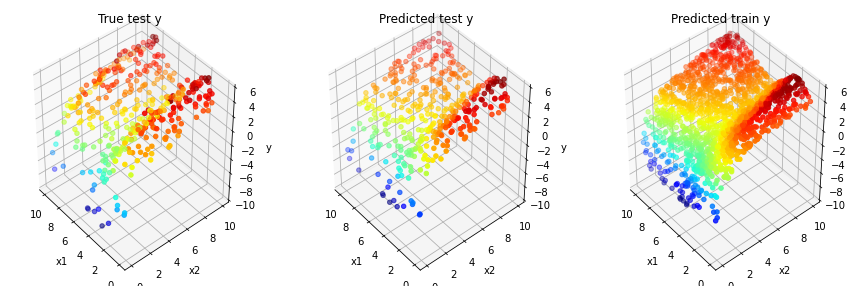

3400 tensor(1.0960, grad_fn=<MseLossBackward>)


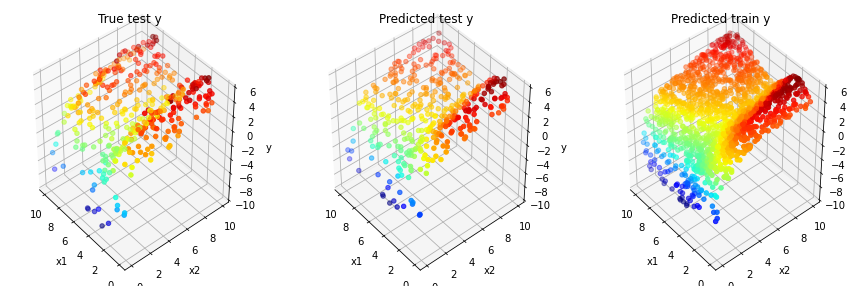

3600 tensor(1.0694, grad_fn=<MseLossBackward>)


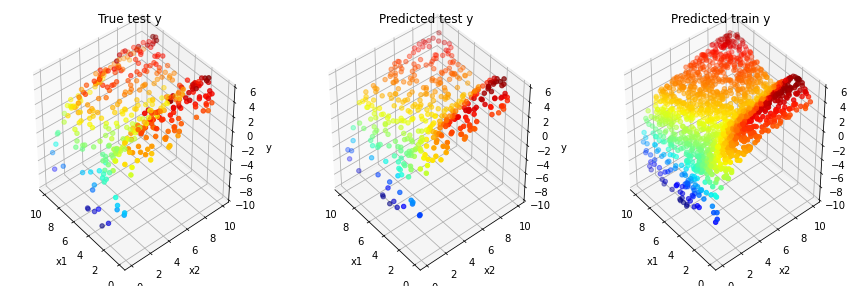

3800 tensor(1.0432, grad_fn=<MseLossBackward>)


In [20]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# Construct Model
model = MLPModel()
# print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))  # 보델 내에서 학습 하는 파라미터 수 카운트

# ======= Construct Optimizer ======= #
lr = 0.005  # Learning Rate를 하나 정해준다
optimizer = optim.SGD(model.parameters(), lr=lr)  # optimizer는 SGD Class로부터 만든 것이다

# 각 Epoch마다 loss의 변화를 관측한다
# 매 학습단계에서의 epoch값과 그 때의 loss값을 저장할 리스트를 만들어준다
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []  # what is mae??
                     # mean_absolute_error

epoch = 4000  # 학습 횟수(epoch)는 400으로 지정!
# Training, Validation, Evaluation 3단계로 구성!

for i in range(epoch):

    # ======= Train ======= #
    model.train()  # model을 train 모드로 세팅
                   # model을 평가하기 위해서는 eval() 모드로 변경한다!
                   # train, eval시 다르기 떄문에 기억하자!

    optimizer.zero_grad()  # 남아있는 잔여 gradient를 0으로 초기화
                           # optimizer에 남아있을 수 있는 잔여 Gradient를 0으로 초기화 해준다

    # input_x, true_y, pred_y 세가지를 활용하는 것을 기억하자!
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)  # hypothesis
                             # model에 input값을 넣어주면 된다
    # print(input_x.shape, true_y.shape, pred_y.shape)
    # print(pred_y.shape, true_y.shape)

    loss = reg_loss(pred_y.squeeze(), true_y)  # Q. 왜 Squeeze를 하는거지?
    loss.backward()  # backward()를 통해 gradient를 구해준다
    optimizer.step()  # step()을 통해서 gradient를 바탕으로 파라미터를 업데이트해준다
    list_epoch.append(i)
    # list_train_loss.append(loss.detach().numpy())
    list_train_loss.append(loss.item())

    # ======= Validation ======= #
    model.eval()  # model을 평가할때는 model.eval()을 사용
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())  # loss.detach(): gradient를 신경쓰지 않는다.
                                                 # loss.item()을 해도 한 번에 된다고함
    # print(loss.item())


    # ======= Evaluation =======
    # Evaluation은 200 Epoch마다 이루어진다
    if i % 200 == 0:  # 200 회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려본다


        # ======= Calculate MAE =======
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy()
        mae = mean_absolute_error(true_y, pred_y)  # sklearn 함수들은 true_y가 꼭 먼저 와야 합니다.
        
        list_mae.append(mae)
        list_mae_epoch.append(i)

        fig = plt.figure(figsize=(15, 5))

        # ======= True Y Scattering ======= #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()
        
        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

In [21]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## 5. Report Experiment
* 학습과정에서 기록했던 train_loss와 val_loss를 그려본다
* loss가 꾸준히 줄어드는지 학인하고 val_loss가 증가하기 시작한다면 그 이상의 학습은 점점 모델의 성능을 망침을 뜻한다.

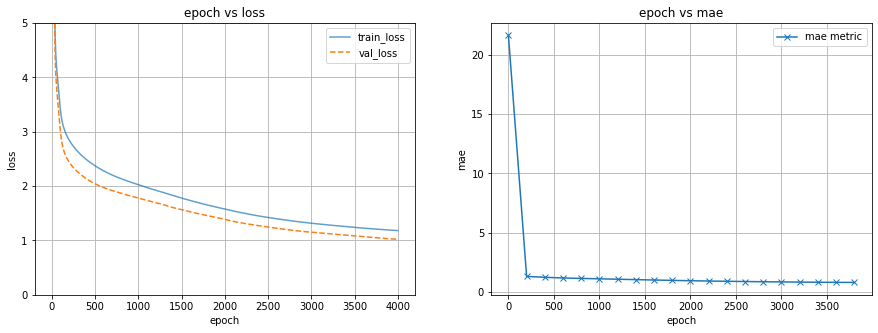

In [22]:
fig = plt.figure(figsize=(15, 5))

# ======= Loss Fluctuation ======= #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss', alpha=0.7)
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ======= Metric Fluctuation ======= #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()

In [ ]:
Fluctuation 